In [1]:
# Nativos
import random as rn
import os
import sys
import gc
import json

#calculo
import numpy as np
import pandas as pd
import scipy as sp

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['.ipynb_checkpoints',
 'CONTENT_CATEGORY.zip',
 'CONTENT_CATEGORY_BOTTOM.zip',
 'CONTENT_CATEGORY_TOP.zip',
 'conversiones.zip',
 'data.zip',
 'data2.zip',
 'device_data.zip',
 'PAGE.zip',
 'pageviews.zip',
 'pageviews_complemento.zip',
 'pageview_with_previous_2.csv',
 'sampleSubmission.zip',
 'SITE_ID.zip']

In [2]:
pageview = pd.read_csv('pageview_trimestral_percent.csv')
print(pageview.shape)

pageview.head()

(44924, 4079)


,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_2,none_202,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.003903,0.0,...,0.000781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
pageview.dtypes

trimestre      int64
USER_ID        int64
1000_1000    float64
1000_2       float64
1000_40      float64
              ...   
none_40      float64
none_45      float64
none_5       float64
none_85      float64
none_9       float64
Length: 4079, dtype: object

In [4]:
with open('convertions.json', 'r') as outfile_names:
    dict_conversion = json.load(outfile_names)

len(dict_conversion)

4

In [5]:
for trim in pageview['trimestre'].unique():
    print(trim, len(dict_conversion[str(trim)]))

1 246
2 374
3 392
4 391


In [6]:
for trim in pageview['trimestre'].unique():
    print(
        trim, 
        len(dict_conversion.get(str(trim + 1), []))
    )

1 374
2 392
3 391
4 0


In [7]:
pageview['hizo_conversion_este_mes'] = pageview[['trimestre', 'USER_ID']].apply(
    lambda _: _[1] in dict_conversion.get(str(_[0]), []), axis=1
).astype(int)

pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_202,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.003903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
pageview['convertion'] = pageview[['trimestre', 'USER_ID']].apply(
    lambda _: _[1] in dict_conversion.get(str(_[0] + 1), []), axis=1
).astype(int)

pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes,convertion
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.003903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [9]:
pageview['hizo_conversion_trim_pasado'] = pageview[['trimestre', 'USER_ID']].apply(
    lambda _: _[1] in dict_conversion.get(str(_[0] - 1), []), axis=1
).astype(int)

pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes,convertion,hizo_conversion_trim_pasado
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.003903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [10]:
pageview['convertion'] = pageview['convertion'].fillna(0)
pd.crosstab(
    pageview['convertion'], pageview['trimestre']
)

trimestre,1,2,3,4
convertion,,,,
0,10567,10816,10970,11429
1,369,387,386,0


In [11]:
pageview['hizo_conversion_este_mes'] = pageview['hizo_conversion_este_mes'].fillna(0)
pd.crosstab(
    pageview['hizo_conversion_este_mes'], pageview['trimestre']
)

trimestre,1,2,3,4
hizo_conversion_este_mes,,,,
0,10690,10829,10964,11038
1,246,374,392,391


In [12]:
pageview['hizo_conversion_trim_pasado'] = pageview['hizo_conversion_trim_pasado'].fillna(0)
pd.crosstab(
    pageview['hizo_conversion_trim_pasado'], pageview['trimestre']
)

trimestre,1,2,3,4
hizo_conversion_trim_pasado,,,,
0,10936,10957,10982,11037
1,0,246,374,392


In [13]:
pageview['2_conversiones_seguidas'] = pageview[['hizo_conversion_este_mes', 'hizo_conversion_trim_pasado']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
).astype(int)

pd.crosstab(
    pageview['2_conversiones_seguidas']  , pageview['trimestre']
)

trimestre,1,2,3,4
2_conversiones_seguidas,,,,
0,10936,11145,11268,11335
1,0,58,88,94


In [14]:
pageview.dtypes.head(2)

trimestre    int64
USER_ID      int64
dtype: object

### SPEED

In [15]:
spped = pd.read_csv('speed_trimestral_percent.csv')
print(spped.shape)

spped.head()

(44893, 6)


,trimestre,USER_ID,speed_0,speed_1,speed_2,speed_3
0,4,0,0.017857,0.437500,0.000000,0.544643
1,4,1,0.644068,0.254237,0.101695,0.000000
2,4,2,0.000000,0.621622,0.162162,0.216216
3,4,3,0.000000,0.964912,0.035088,0.000000
4,4,4,0.000000,0.833333,0.166667,0.000000


In [16]:
print(pageview.shape)
pageview = pageview.merge(spped, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4083)
(44924, 4087)


In [17]:
del spped

### DEVICE

In [18]:
device = pd.read_csv('device_trimestral_percent.csv')
print(device.shape)

device.head()

(44893, 4)


,trimestre,USER_ID,device_0,device_1
0,4,0,0.000000,1.000000
1,4,1,0.152542,0.847458
2,4,2,0.256757,0.743243
3,4,3,0.087719,0.912281
4,4,4,0.958333,0.041667


In [19]:
print(pageview.shape)
pageview = pageview.merge(device, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4087)
(44924, 4089)


In [20]:
del device

### SITE_ID

In [21]:
site_id = pd.read_csv('site_id_trimestral_percent.csv')
print(site_id.shape)

site_id.head()

(44924, 6)


,trimestre,USER_ID,1,2,3,4
0,1,0,0.065725,0.840304,0.093971,0.00000
1,1,1,0.131621,0.775281,0.093098,0.00000
2,1,2,0.245823,0.467780,0.286396,0.00000
3,1,3,0.132948,0.820809,0.046243,0.00000
4,1,4,0.044496,0.640125,0.302888,0.01249


In [22]:
print(pageview.shape)
pageview = pageview.merge(site_id, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4089)
(44924, 4093)


In [23]:
del site_id

### SCHEDULE

In [24]:
schedule = pd.read_csv('schedule_trimestral_percent.csv')
print(schedule.shape)

schedule.head()

(44924, 44)


,trimestre,USER_ID,0_almuerzo,0_antes_del_trabajo,0_luego_del_trabajo,0_madrugada,0_trabajo_manana,0_trabajo_tarde,1_almuerzo,1_antes_del_trabajo,...,5_luego_del_trabajo,5_madrugada,5_trabajo_manana,5_trabajo_tarde,6_almuerzo,6_antes_del_trabajo,6_luego_del_trabajo,6_madrugada,6_trabajo_manana,6_trabajo_tarde
0,1,0,0.022271,0.013580,0.031505,0.000000,0.097230,0.009234,0.024986,0.002716,...,0.012493,0.000000,0.015209,0.019555,0.003259,0.0,0.000000,0.000000,0.006518,0.013580
1,1,1,0.085072,0.000000,0.000000,0.000000,0.060995,0.000000,0.012841,0.000000,...,0.020867,0.000000,0.030498,0.000000,0.017657,0.0,0.019262,0.000000,0.035313,0.000000
2,1,2,0.221957,0.000000,0.009547,0.000000,0.050119,0.000000,0.073986,0.000000,...,0.000000,0.000000,0.014320,0.000000,0.000000,0.0,0.000000,0.000000,0.009547,0.000000
3,1,3,0.086705,0.000000,0.005780,0.000000,0.046243,0.092486,0.028902,0.000000,...,0.000000,0.023121,0.011561,0.052023,0.005780,0.0,0.011561,0.000000,0.031792,0.014451
4,1,4,0.092116,0.031226,0.017955,0.044496,0.032006,0.008587,0.013271,0.008587,...,0.018735,0.005464,0.003123,0.002342,0.000000,0.0,0.003903,0.017174,0.007806,0.006245


In [25]:
print(pageview.shape)
pageview = pageview.merge(schedule, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4093)
(44924, 4135)


In [26]:
del schedule

### RANGO DÍAS

In [27]:
dias = pd.read_csv('rango_dias_trimestral_percent.csv')
print(dias.shape)

dias.head()

(44924, 7)


,trimestre,USER_ID,18_24,7_12,fin_de_mes,inicio_mes,quincena
0,1,0,0.146116,0.228680,0.143400,0.356871,0.124932
1,1,1,0.199037,0.174960,0.227929,0.231140,0.166934
2,1,2,0.224344,0.350835,0.119332,0.121718,0.183771
3,1,3,0.147399,0.167630,0.187861,0.268786,0.228324
4,1,4,0.167838,0.530835,0.074941,0.155347,0.071038


In [28]:
print(pageview.shape)
pageview = pageview.merge(dias, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4135)
(44924, 4140)


In [29]:
del dias

### CATEGORIA DE CONTENIDO

In [30]:
category = pd.read_csv('content_category_trimestral_percent.csv')
print(category.shape)

category.head()

(44924, 46)


,trimestre,USER_ID,10_5,11_4,12_4,13_4,14_5,15_5,16_2,17_2,...,50_5,59_2,5_2,60_2,61_2,63_2,6_4,7_5,8_5,9_4
0,1,0,0.000543,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.005432,0.0,0.0,0.0,0.002716,0.001630,0.000543,0.000543
1,1,1,0.001605,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.001605,0.0,0.0,0.0,0.004815,0.000000,0.000000,0.000000
2,1,2,0.002387,0.009547,0.031026,0.019093,0.011933,0.004773,0.00000,0.000000,...,0.0,0.0,0.014320,0.0,0.0,0.0,0.009547,0.002387,0.002387,0.000000
3,1,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.011561,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002890
4,1,4,0.000000,0.000000,0.000000,0.000781,0.000000,0.000000,0.01171,0.005464,...,0.0,0.0,0.012490,0.0,0.0,0.0,0.009368,0.005464,0.000000,0.001561


In [31]:
print(pageview.shape)
pageview = pageview.merge(category, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4140)
(44924, 4184)


In [32]:
del category

### BUSQUEDA

In [33]:
search = pd.read_csv('search_trimestral_percent.csv')
print(search.shape)

search.head()

(44924, 3)


,trimestre,USER_ID,1
0,1,0,1.0
1,1,1,1.0
2,1,2,1.0
3,1,3,1.0
4,1,4,1.0


In [34]:
print(pageview.shape)
pageview = pageview.merge(search, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4184)
(44924, 4185)


In [35]:
del search

### PAGINA SOLA

In [36]:
simple = pd.read_csv('pageview_simple_trimestral_percent.csv')
print(simple.shape)

simple.head()

(44924, 798)


,trimestre,USER_ID,page_1,page_10,page_100,page_1000,page_1001,page_1018,page_1019,page_102,...,page_950,page_96,page_963,page_97,page_972,page_98,page_980,page_99,page_994,page_997
0,1,0,0.058121,0.177621,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,1,1,0.125201,0.176565,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,1,2,0.038186,0.145585,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,1,3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,1,4,0.019516,0.270882,0.002342,0.0,0.0,0.0,0.0,0.004684,...,0.0,0.000781,0.0,0.000781,0.0,0.000781,0.0,0.004684,0.0,0.0


In [37]:
print(pageview.shape)
pageview = pageview.merge(simple, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4185)
(44924, 4981)


In [38]:
del simple

In [39]:
nulos = pageview.isnull().sum()
nulos[nulos > 0]

speed_0     32
speed_1     32
speed_2     32
speed_3     32
device_0    32
device_1    32
dtype: int64

In [40]:
pageview = pageview.fillna(0)

In [41]:
pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,page_950,page_96,page_963,page_97,page_972,page_98,page_980,page_99,page_994,page_997
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.003903,0.0,...,0.0,0.000781,0.0,0.000781,0.0,0.000781,0.0,0.004684,0.0,0.0


In [42]:
historico_conversiones = pageview[['trimestre', 'USER_ID', '2_conversiones_seguidas', 'hizo_conversion_este_mes', 'hizo_conversion_trim_pasado', 'convertion']]
historico_conversiones.head()

,trimestre,USER_ID,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado,convertion
0,1,0,0,0,0,0
1,1,1,0,0,0,0
2,1,2,0,0,0,0
3,1,3,0,0,0,0
4,1,4,0,0,0,0


In [43]:
historico_conversiones.shape

(44924, 6)

In [44]:
del pageview['2_conversiones_seguidas']
del pageview['hizo_conversion_este_mes']
del pageview['hizo_conversion_trim_pasado']
del pageview['convertion']

In [45]:
pageview['trimestre'].unique()

array([1, 2, 3, 4], dtype=int64)

In [46]:
pageview['trimestre'] = pageview['trimestre'].astype(int)

In [47]:
data = []

for trim in [2, 3, 4]:
    print(trim, trim-1)
    
    grupo = pageview[pageview['trimestre'].isin([trim, trim-1])].groupby(by=['USER_ID']).mean().reset_index()
    grupo['trimestre'] = trim
    data.append(grupo)
    del grupo

2 1
3 2
4 3


In [48]:
del pageview

In [49]:
pageview = pd.concat(
    data, 
    ignore_index=True,
    axis=0
)
pageview.head()

,USER_ID,trimestre,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,page_950,page_96,page_963,page_97,page_972,page_98,page_980,page_99,page_994,page_997
0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00037,0.0,0.00037,0.0,0.00037,0.0,0.001110,0.0,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.000973,0.0,0.0
3,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.001445,0.0,0.0
4,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.008918,0.0,...,0.0,0.00039,0.0,0.00039,0.0,0.00039,0.0,0.006212,0.0,0.0


In [50]:
pageview.shape

(34392, 4977)

In [51]:
pageview.dtypes.head(3)

USER_ID        int64
trimestre      int64
1000_1000    float64
dtype: object

In [52]:
historico_conversiones.dtypes.head(3)

trimestre                  int64
USER_ID                    int64
2_conversiones_seguidas    int32
dtype: object

In [53]:
historico_conversiones.groupby(by=['trimestre']).size()

trimestre
1    10936
2    11203
3    11356
4    11429
dtype: int64

In [54]:
for trim in historico_conversiones['trimestre'].unique():
    print(trim, historico_conversiones[historico_conversiones['trimestre'] == trim]['USER_ID'].unique().shape)

1 (10936,)
2 (11203,)
3 (11356,)
4 (11429,)


In [55]:
pageview.groupby(by=['trimestre']).size()

trimestre
2    11314
3    11489
4    11589
dtype: int64

In [56]:
for trim in pageview['trimestre'].unique():
    print(trim, 
          pageview[pageview['trimestre'] == trim]['USER_ID'].unique().shape,
          len(set(pageview[pageview['trimestre'] == trim]['USER_ID'].unique()) & set(historico_conversiones[historico_conversiones['trimestre'] == trim]['USER_ID'].unique()))
         )

2 (11314,) 11203
3 (11489,) 11356
4 (11589,) 11429


In [57]:
#11589 - 11429, 11489 - 11356, 11314 - 11203

In [58]:
null = historico_conversiones.isnull().sum()
null[null > 0]

Series([], dtype: int64)

In [59]:
historico_conversiones = historico_conversiones.fillna(0)

In [60]:
pageview = pageview.merge(
    historico_conversiones, how='left', on=['USER_ID', 'trimestre'])
pageview.head()

,USER_ID,trimestre,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,page_972,page_98,page_980,page_99,page_994,page_997,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado,convertion
0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00037,0.0,0.001110,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.000973,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.001445,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.008918,0.0,...,0.0,0.00039,0.0,0.006212,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
nulo = pageview.isnull().sum()
nulo[nulo > 0]

2_conversiones_seguidas        404
hizo_conversion_este_mes       404
hizo_conversion_trim_pasado    404
convertion                     404
dtype: int64

In [62]:
pageview = pageview.fillna(0)

# MODELAMIENTO

In [63]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

time_split = TimeSeriesSplit(
    n_splits=10
)

In [64]:
X_train = pageview[pageview['trimestre'].astype(str).isin(['2', '3'])].drop(['trimestre', 'USER_ID', 'convertion'], axis=1)
X_test = pageview[pageview['trimestre'].astype(str).isin(['4'])].drop(['trimestre', 'USER_ID', 'convertion'], axis=1)
users_test = pageview[pageview['trimestre'].astype(str).isin(['4'])]['USER_ID']
users_train = pageview[pageview['trimestre'].astype(str).isin(['2', '3'])]['USER_ID']
y_train = pageview[pageview['trimestre'].astype(str).isin(['2', '3'])]['convertion']

In [65]:
users_test.shape

(11589,)

In [66]:
X_train.shape

(22803, 4978)

In [67]:
X_test.shape

(11589, 4978)

In [68]:
y_train.shape

(22803,)

In [69]:
#del pageview
gc.collect()

110

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold

repeat = RepeatedStratifiedKFold(
    n_splits=4, n_repeats=2, random_state=SEED
)

In [71]:
lasso_cv = LassoCV(
    cv=repeat, 
    selection='cyclic',
    random_state=SEED, 
    verbose=1,
    normalize=False,
    n_jobs=4
)

sfm = SelectFromModel(lasso_cv)
sfm.fit(
    X_train, y_train
)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:  5.9min finished


SelectFromModel(estimator=LassoCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=29082013),
                                  n_jobs=4, random_state=29082013, verbose=1))

In [72]:
def var_cols_relevants(sfm, X):
    bool_select_var = list(sfm.get_support())
    list_columns = list(X.columns)
    return list({
       list_columns[i]: bool_select_var[i] for i in range(len(list_columns)) if bool_select_var[i]
    }.keys())

In [73]:
list_var_relevants_r = var_cols_relevants(sfm, X_train)
print(len(list_var_relevants_r))

110


In [74]:
X_train[list_var_relevants_r].head()

,108_109,10_10,110_57,14_2,1_2,202_202,20_4,21_32,21_57,23_3,...,page_57,page_6,page_65,page_85,page_87,page_88,page_89,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado
0,0.000000,0.003110,0.000000,0.000272,0.027963,0.0,0.002468,0.001283,0.000000,0.001110,...,0.000642,0.004369,0.000370,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.030421,0.000000,0.000000,0.076862,0.0,0.004013,0.001605,0.000000,0.000000,...,0.000000,0.000803,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.053620,0.000000,0.000000,0.015163,0.0,0.004332,0.000000,0.003139,0.000000,...,0.005084,0.000973,0.006498,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.005058,0.000000,0.0,0.006503,0.010116,0.000723,0.000723,...,0.007948,0.005058,0.002168,0.158237,0.072977,0.015896,0.007948,0.0,0.0,0.0
4,0.005048,0.129902,0.005048,0.000000,0.002335,0.0,0.000774,0.000000,0.000000,0.007403,...,0.024040,0.026019,0.011246,0.012033,0.000000,0.000000,0.005822,0.0,0.0,0.0


In [75]:
lasso_cv = LassoCV(
    cv=time_split, 
    selection='cyclic',
    random_state=SEED, 
    verbose=1,
    normalize=False,
    n_jobs=4
)

sfm = SelectFromModel(lasso_cv)
sfm.fit(
    X_train, y_train
)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SelectFromModel(estimator=LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
                                  n_jobs=4, random_state=29082013, verbose=1))

In [76]:
list_var_relevants = var_cols_relevants(sfm, X_train)
print(len(list_var_relevants))

29


In [77]:
X_train[list_var_relevants].head()

,2_2_x,2_3,speed_0,speed_2,speed_3,1_x,3,0_luego_del_trabajo,0_trabajo_manana,2_luego_del_trabajo,...,page_2,page_20,page_39,page_4,page_41,page_43,page_85,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado
0,0.012389,0.010810,0.015210,0.000000,0.210692,0.052478,0.091397,0.025745,0.114122,0.058788,...,0.094275,0.009825,0.001555,0.007775,0.000272,0.000543,0.000000,0.0,0.0,0.0
1,0.011217,0.008018,0.927286,0.000000,0.000000,0.128910,0.051341,0.055911,0.100785,0.058387,...,0.120895,0.009627,0.000000,0.007223,0.000000,0.000803,0.000000,0.0,0.0,0.0
2,0.031700,0.038548,0.165207,0.047403,0.093242,0.219215,0.319268,0.004773,0.028951,0.021259,...,0.167280,0.021881,0.012646,0.014631,0.000000,0.000973,0.000000,0.0,0.0,0.0
3,0.019509,0.061416,0.005102,0.000000,0.005102,0.091040,0.302023,0.002890,0.040462,0.032514,...,0.156069,0.011561,0.002168,0.025289,0.000723,0.000000,0.158237,0.0,0.0,0.0
4,0.025668,0.036517,0.000000,0.310250,0.012658,0.041598,0.375128,0.033745,0.046189,0.115903,...,0.091353,0.006205,0.000000,0.003096,0.006219,0.007026,0.012033,0.0,0.0,0.0


In [78]:
print(list_var_relevants)

['2_2_x', '2_3', 'speed_0', 'speed_2', 'speed_3', '1_x', '3', '0_luego_del_trabajo', '0_trabajo_manana', '2_luego_del_trabajo', '2_trabajo_tarde', '3_luego_del_trabajo', '5_antes_del_trabajo', '18_24', 'fin_de_mes', 'inicio_mes', '16_2', '4_2_y', 'page_110', 'page_2', 'page_20', 'page_39', 'page_4', 'page_41', 'page_43', 'page_85', '2_conversiones_seguidas', 'hizo_conversion_este_mes', 'hizo_conversion_trim_pasado']


In [79]:
print(list_var_relevants_r)

['108_109', '10_10', '110_57', '14_2', '1_2', '202_202', '20_4', '21_32', '21_57', '23_3', '27_27', '27_69', '2_14', '2_2_x', '2_3', '2_9', '321_321', '3_20', '3_21', '3_27', '41_43', '451_451', '45_2', '5_2_x', '82_182', '85_14', 'speed_0', 'speed_1', 'speed_2', 'speed_3', 'device_0', 'device_1', '1_x', '3', '0_antes_del_trabajo', '0_luego_del_trabajo', '0_madrugada', '0_trabajo_manana', '1_almuerzo', '1_antes_del_trabajo', '1_madrugada', '1_trabajo_manana', '1_trabajo_tarde', '2_antes_del_trabajo', '2_luego_del_trabajo', '2_madrugada', '2_trabajo_tarde', '3_almuerzo', '3_antes_del_trabajo', '3_luego_del_trabajo', '3_trabajo_manana', '3_trabajo_tarde', '4_antes_del_trabajo', '4_luego_del_trabajo', '4_madrugada', '4_trabajo_manana', '4_trabajo_tarde', '5_almuerzo', '5_antes_del_trabajo', '5_luego_del_trabajo', '5_madrugada', '5_trabajo_manana', '5_trabajo_tarde', '6_almuerzo', '6_luego_del_trabajo', '6_madrugada', '6_trabajo_tarde', '18_24', 'fin_de_mes', 'inicio_mes', '16_2', '1_1_y',

In [80]:
from sklearn.feature_selection import SelectKBest, chi2

best = SelectKBest(chi2, k=300)
best.fit(
    X_train, y_train
)

SelectKBest(k=300, score_func=<function chi2 at 0x0000028811EEBE50>)

In [81]:
list_var_chi = var_cols_relevants(best, X_train)
print(len(list_var_chi))

300


In [82]:
X_train[list_var_chi].head()

,108_109,108_110,108_1247,108_41,108_43,109_108,109_109,109_110,109_2,109_41,...,page_831,page_85,page_87,page_88,page_89,page_9,page_91,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.071517,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.075191,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.061584,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.158237,0.072977,0.015896,0.007948,0.000000,0.002168,0.0,0.0,0.0
4,0.005048,0.0,0.0,0.0,0.0,0.0,0.0,0.005048,0.0,0.0,...,0.0,0.012033,0.000000,0.000000,0.005822,0.001171,0.000390,0.0,0.0,0.0


In [83]:
print(list_var_chi)

['108_109', '108_110', '108_1247', '108_41', '108_43', '109_108', '109_109', '109_110', '109_2', '109_41', '10_1', '10_111', '10_12', '10_123', '10_15', '10_18', '110_109', '110_110', '110_1259', '110_2', '110_20', '110_21', '110_27', '110_285', '110_296', '110_3', '110_40', '110_41', '110_42', '110_5', '110_57', '111_1', '111_10', '111_254', '1227_1227', '1227_611', '123_111', '1247_1248', '1248_1249', '1249_1250', '1250_1251', '1251_57', '1259_110', '12_10', '133_345', '153_2', '153_3', '153_41', '153_5', '15_1', '163_164', '164_165', '165_210', '168_168', '190_163', '1_1_x', '1_2', '202_202', '202_203', '202_40', '203_202', '203_203', '203_40', '20_39', '20_4', '20_41', '210_211', '211_212', '212_39', '21_41', '23_153', '23_41', '24_25', '25_49', '26_41', '26_43', '27_153', '27_23', '27_41', '27_69', '285_110', '285_285', '285_286', '285_41', '286_285', '286_287', '287_133', '287_286', '287_345', '287_57', '287_61', '289_2', '296_110', '296_41', '2_1', '2_14', '2_27', '2_40', '2_83'

In [84]:
from sklearn.feature_selection import f_classif

anova = SelectKBest(f_classif, k=300)
anova.fit(
    X_train, y_train
)

SelectKBest(k=300)

In [85]:
list_var_anova = var_cols_relevants(anova, X_train)
print(len(list_var_anova))

300


In [86]:
X_train[list_var_anova].head()

,102_154,108_109,108_110,108_1247,108_2,108_41,108_5,109_108,109_109,109_110,...,page_56,page_57,page_634,page_69,page_786,page_89,page_91,2_conversiones_seguidas,hizo_conversion_este_mes,hizo_conversion_trim_pasado
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000272,0.000642,0.0,0.000370,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.005084,0.0,0.004773,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.007948,0.0,0.001445,0.0,0.007948,0.002168,0.0,0.0,0.0
4,0.008918,0.005048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005048,...,0.000000,0.024040,0.0,0.008944,0.0,0.005822,0.000390,0.0,0.0,0.0


In [87]:
print(list_var_anova)

['102_154', '108_109', '108_110', '108_1247', '108_2', '108_41', '108_5', '109_108', '109_109', '109_110', '109_2', '109_27', '109_3', '109_41', '109_5', '109_57', '10_111', '10_123', '110_1', '110_109', '110_110', '110_1259', '110_14', '110_2', '110_20', '110_21', '110_26', '110_27', '110_285', '110_296', '110_3', '110_369', '110_39', '110_40', '110_41', '110_42', '110_45', '110_5', '110_57', '111_1', '111_10', '111_2', '111_254', '114_2', '1227_3', '123_111', '1247_108', '1247_1248', '1248_1247', '1248_1249', '1249_1248', '1249_1250', '1250_1251', '1250_41', '1251_1250', '1251_57', '1259_110', '1259_3', '1259_41', '129_3', '133_345', '138_2', '153_2', '153_20', '153_23', '153_27', '153_3', '153_369', '153_40', '153_41', '153_5', '154_57', '163_164', '164_165', '165_210', '179_5', '190_163', '190_260', '190_39', '1_138', '1_2', '1_289', '20_1259', '20_39', '20_4', '20_41', '210_211', '211_212', '212_39', '21_1259', '21_1477', '21_41', '23_102', '23_1494', '23_153', '23_41', '23_61', '

In [88]:
import lightgbm as lgb
fit_params = {
    "eval_metric" : 'auc', 
    'verbose': 2
}

lgbm_grid = {
    'bagging_fraction': [0.65, 0.75, 0.85, 0.95],
    'feature_fraction': [0.15, 0.25, 0.35, 0.45],
    'n_estimators': [150, 450, 750],
    'num_leaves': [33, 65],
    'max_depth': [5, 3, 7],
    'learning_rate': [0.025, 0.05, 0.1, 0.15],
    'min_data_in_leaf': [100, 500],
    'extra_trees': [True, False],
    'deterministic': [True, False],
    'tree_learner': ['serial'],
    'boosting': ['gbdt'],
    'lambda_l2': [0],
    'lambda_l1': [0],
    'is_unbalance': [True],
    'min_gain_to_split': [1]
}

In [89]:
def apply_lgbm(X_train_part, X_test_part, y_train, users, add='', cv=None):
    model_lgbm = lgb.LGBMClassifier(
        seed=SEED, 
        feature_fraction_seed=SEED, 
        drop_seed=SEED,
        bagging_seed=SEED
    )
    grid = RandomizedSearchCV(
        model_lgbm, lgbm_grid, cv=cv, 
        n_jobs=-1, 
        scoring='roc_auc', 
        verbose=1,
        n_iter=100
    )
    grid.fit(X_train_part, y_train, **fit_params)
    print("-> ", grid.best_score_)
    
    predict_test = grid.best_estimator_.predict_proba(X_test_part)[:,1]
    predict_test = pd.DataFrame(
        {'USER_ID':users, 
         'SCORE':predict_test} 
    )
    display(predict_test.head())
    print(predict_test[predict_test['SCORE'] < 0.01].shape)
    print(predict_test[predict_test['SCORE'] > 0.5].shape)
    print(predict_test[predict_test['SCORE'] > 0.99].shape)
    
    return grid, predict_test

In [90]:
X_train.shape, X_test.shape

((22803, 4978), (11589, 4978))

In [91]:
%%time

grid_1, predict_1 = apply_lgbm(
    X_train[list_var_relevants], 
    X_test[list_var_relevants], 
    y_train, 
    users_test, 
    add='lasso',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.15, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8416221501543918


,USER_ID,SCORE
22803,0,0.207773
22804,1,0.148465
22805,2,0.094441
22806,3,0.246417
22807,4,0.626685


(0, 2)
(3069, 2)
(0, 2)
Wall time: 9min 1s


4328

In [92]:
%%time

grid_2, predict_2 = apply_lgbm(
    X_train[list_var_chi], 
    X_test[list_var_chi], 
    y_train, 
    users_test, 
    add='chi',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8511793948043426


,USER_ID,SCORE
22803,0,0.218047
22804,1,0.079863
22805,2,0.090647
22806,3,0.164530
22807,4,0.547215


(31, 2)
(2839, 2)
(0, 2)
Wall time: 32min 42s


5050

In [93]:
%%time

grid_3, predict_3 = apply_lgbm(
    X_train[list_var_anova], 
    X_test[list_var_anova], 
    y_train, 
    users_test, 
    add='anova',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8497982292103254


,USER_ID,SCORE
22803,0,0.197731
22804,1,0.097343
22805,2,0.093607
22806,3,0.130613
22807,4,0.640548


(87, 2)
(2731, 2)
(0, 2)
Wall time: 26min 59s


4064

In [94]:
#grid_3.best_estimator_.feature_importances_

In [95]:
#print(dir(grid_3.best_estimator_))

### UP

In [96]:
def _save(predict): 
    sub = pd.read_csv('data/sampleSubmission.zip')
    sub = sub.merge(
        predict, 
        how='left', 
        on=['USER_ID']
    )
    
    sub['SCORE'] = sub['SCORE_y'].combine_first(sub['SCORE_x'])
    del sub['SCORE_y']
    del sub['SCORE_x']
    
    return sub

In [97]:
predict_1_ = _save(predict_1)
predict_1_.to_csv('lgbm_time_split_lasso_2.csv', index=False)

In [98]:
predict_2_ = _save(predict_2)
predict_2_.to_csv('lgbm_time_split_chi_2.csv', index=False)

In [99]:
predict_3_ = _save(predict_3)
predict_3_.to_csv('lgbm_time_split_anova_2.csv', index=False)

### STRATIFICACION

In [100]:
%%time

grid_1_r, predict_1_r = apply_lgbm(
    X_train[list_var_relevants_r], 
    X_test[list_var_relevants_r], 
    y_train, 
    users_test, 
    add='lasso',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.850689152287569


,USER_ID,SCORE
22803,0,0.267986
22804,1,0.133923
22805,2,0.091340
22806,3,0.268071
22807,4,0.535489


(0, 2)
(2883, 2)
(0, 2)
Wall time: 30min 21s


2857

In [101]:
%%time

grid_2_r, predict_2_r = apply_lgbm(
    X_train[list_var_chi], 
    X_test[list_var_chi], 
    y_train, 
    users_test, 
    add='chi',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8523648209600481


,USER_ID,SCORE
22803,0,0.197129
22804,1,0.100021
22805,2,0.048370
22806,3,0.134725
22807,4,0.585246


(61, 2)
(2884, 2)
(0, 2)
Wall time: 47min 13s


2364

In [102]:
%%time

grid_3_r, predict_3_r = apply_lgbm(
    X_train[list_var_anova], 
    X_test[list_var_anova], 
    y_train, 
    users_test, 
    add='anova',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.15, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8509317505163173


,USER_ID,SCORE
22803,0,0.285457
22804,1,0.117107
22805,2,0.064090
22806,3,0.113079
22807,4,0.582346


(105, 2)
(2742, 2)
(0, 2)
Wall time: 35min 4s


2126

In [103]:
predict_1_r_ = _save(predict_1_r)
predict_1_r_.to_csv('lgbm_repeat_stratify_lasso_2.csv', index=False)

In [104]:
predict_2_r_ = _save(predict_2_r)
predict_2_r_.to_csv('lgbm_repeat_stratify_chi_2.csv', index=False)

In [105]:
predict_3_r_ = _save(predict_3_r)
predict_3_r_.to_csv('lgbm_repeat_stratify_anova_2.csv', index=False)

In [106]:
predict_r = predict_1_r_.merge(
    predict_2_r_, how='left', on='USER_ID'
).merge(
    predict_3_r_, how='left', on='USER_ID'
)
predict_r.head()

,USER_ID,SCORE_x,SCORE_y,SCORE
0,0,0.267986,0.197129,0.285457
1,1,0.133923,0.100021,0.117107
2,2,0.091340,0.048370,0.064090
3,3,0.268071,0.134725,0.113079
4,4,0.535489,0.585246,0.582346


<AxesSubplot:>

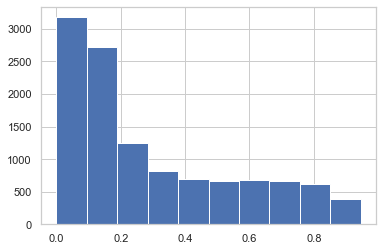

In [107]:
predict_r['SCORE'] = predict_r[['SCORE_x', 'SCORE_y', 'SCORE']].mean(axis=1)
predict_r['SCORE'].hist()

In [108]:
predict_r[['USER_ID','SCORE']].to_csv('lgbm_repeat_stratify_ensamble_2.csv', index=False)

### ANALISIS

In [117]:
import eli5
def get_top_vars(modelo, list_var, top_n=25):
    feat_imp2 = pd.DataFrame({'importance':modelo.feature_importances_})
    feat_imp2['feature'] = list_var
    feat_imp2.sort_values(by='importance', ascending=False, inplace=True)
    top = feat_imp2.iloc[:top_n]
    top.sort_values(by='importance', inplace=True)
    top = top.set_index('feature', drop=True)
    top.plot.barh(title='IMPORTANCIA', figsize=(7,3))
    plt.xlabel('Feature Importance Score')
    plt.show()

In [118]:
grid_1.best_estimator_

LGBMClassifier(bagging_fraction=0.75, bagging_seed=29082013, boosting='gbdt',
               deterministic=True, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.15, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=3, min_data_in_leaf=100, min_gain_to_split=1,
               n_estimators=750, num_leaves=65, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

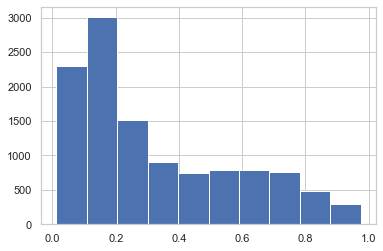

In [119]:
predict_1['SCORE'].hist()

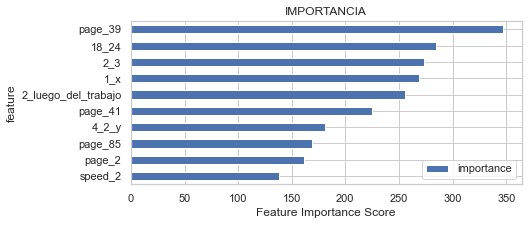

In [120]:
get_top_vars(grid_1.best_estimator_, list_var_relevants, top_n=10)

In [121]:
eli5.show_weights(
     grid_1.best_estimator_, 
     top=10, 
     feature_names = list_var_relevants, 
     show_feature_values=True
)

Weight,Feature
0.3033,page_41
0.1917,page_110
0.1242,hizo_conversion_este_mes
0.0477,page_39
0.0472,16_2
0.0321,speed_2
0.0278,1_x
0.0236,2_3
0.0222,hizo_conversion_trim_pasado
0.0221,18_24


In [122]:
grid_2.best_estimator_

LGBMClassifier(bagging_fraction=0.65, bagging_seed=29082013, boosting='gbdt',
               deterministic=True, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.25, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=3, min_data_in_leaf=100, min_gain_to_split=1,
               n_estimators=450, num_leaves=33, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

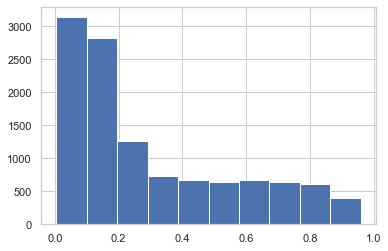

In [127]:
predict_2['SCORE'].hist()

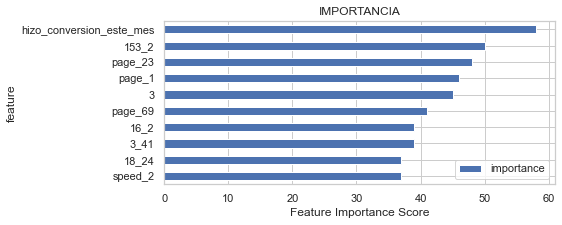

In [132]:
get_top_vars(grid_2.best_estimator_, list_var_chi, top_n=10)

In [138]:
eli5.show_weights(
     grid_2.best_estimator_, 
     top=10, 
     feature_names = list_var_chi, 
     show_feature_values=True
)

Weight,Feature
0.1827,41_108
0.0749,page_110
0.0605,109_110
0.0387,page_41
0.0318,41_3
0.0300,page_286
0.0265,108_109
0.0238,page_321
0.0202,hizo_conversion_este_mes
0.0195,41_2


In [123]:
grid_3.best_estimator_

LGBMClassifier(bagging_fraction=0.85, bagging_seed=29082013, boosting='gbdt',
               deterministic=False, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.25, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=7, min_data_in_leaf=100, min_gain_to_split=1,
               n_estimators=150, num_leaves=65, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

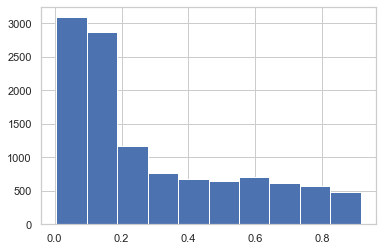

In [128]:
predict_3['SCORE'].hist()

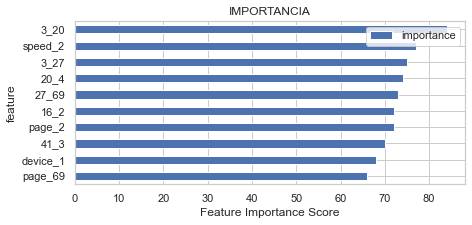

In [133]:
get_top_vars(grid_3.best_estimator_, list_var_anova, top_n=10)

In [139]:
eli5.show_weights(
     grid_3.best_estimator_, 
     top=10, 
     feature_names = list_var_anova, 
     show_feature_values=True
)

Weight,Feature
0.2138,108_109
0.0775,109_110
0.0618,page_110
0.0376,3_41
0.0327,41_3
0.0306,page_41
0.0200,41_2
0.0168,41_108
0.0146,16_2
0.0145,hizo_conversion_este_mes


In [124]:
grid_1_r.best_estimator_

LGBMClassifier(bagging_fraction=0.95, bagging_seed=29082013, boosting='gbdt',
               deterministic=False, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.25, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=3, min_data_in_leaf=100, min_gain_to_split=1,
               n_estimators=450, num_leaves=65, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

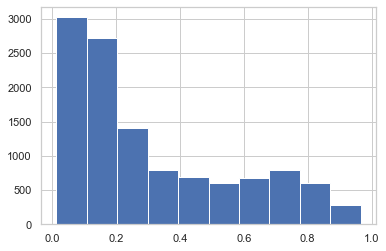

In [129]:
predict_1_r['SCORE'].hist()

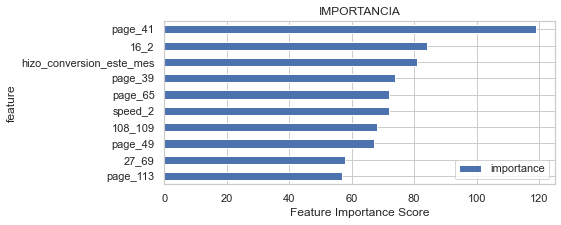

In [134]:
get_top_vars(grid_1_r.best_estimator_, list_var_relevants_r, top_n=10)

In [140]:
eli5.show_weights(
     grid_1_r.best_estimator_, 
     top=10, 
     feature_names = list_var_relevants_r, 
     show_feature_values=True
)

Weight,Feature
0.2596,page_41
0.1340,page_110
0.1192,108_109
0.0481,16_2
0.0411,hizo_conversion_este_mes
0.0282,page_39
0.0193,page_65
0.0192,110_57
0.0150,page_49
0.0131,speed_2


In [125]:
grid_2_r.best_estimator_

LGBMClassifier(bagging_fraction=0.75, bagging_seed=29082013, boosting='gbdt',
               deterministic=False, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.45, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=7, min_data_in_leaf=500, min_gain_to_split=1,
               n_estimators=150, num_leaves=33, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

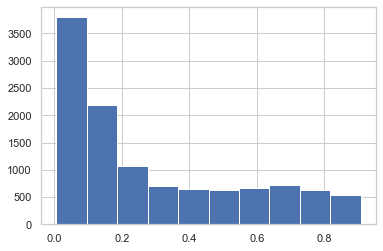

In [130]:
predict_2_r['SCORE'].hist()

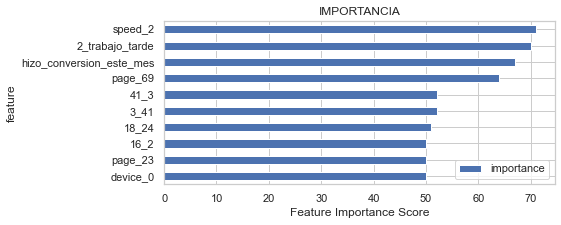

In [135]:
get_top_vars(grid_2_r.best_estimator_, list_var_chi, top_n=10)

In [141]:
eli5.show_weights(
     grid_2_r.best_estimator_, 
     top=10, 
     feature_names = list_var_chi, 
     show_feature_values=True
)

Weight,Feature
0.1866,108_109
0.1249,page_110
0.0726,page_41
0.0425,3_41
0.0303,41_3
0.0287,16_2
0.0251,page_108
0.0238,41_2
0.0206,hizo_conversion_este_mes
0.0174,109_110


In [136]:
grid_3_r.best_estimator_

LGBMClassifier(bagging_fraction=0.65, bagging_seed=29082013, boosting='gbdt',
               deterministic=True, drop_seed=29082013, extra_trees=True,
               feature_fraction=0.15, feature_fraction_seed=29082013,
               is_unbalance=True, lambda_l1=0, lambda_l2=0, learning_rate=0.025,
               max_depth=5, min_data_in_leaf=500, min_gain_to_split=1,
               n_estimators=750, num_leaves=65, seed=29082013,
               tree_learner='serial')

<AxesSubplot:>

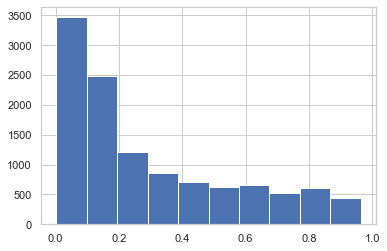

In [131]:
predict_3_r['SCORE'].hist()

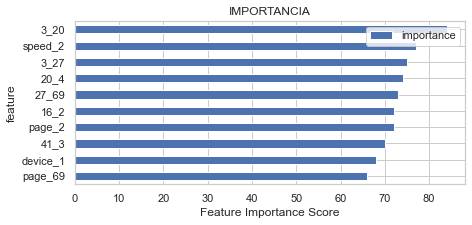

In [137]:
get_top_vars(grid_3.best_estimator_, list_var_anova, top_n=10)

In [142]:
eli5.show_weights(
     grid_3_r.best_estimator_, 
     top=10, 
     feature_names = list_var_anova, 
     show_feature_values=True
)

Weight,Feature
0.1839,3_41
0.0743,109_110
0.0388,108_109
0.0364,285_286
0.0363,page_110
0.0263,page_108
0.0257,41_3
0.0222,page_41
0.0214,page_285
0.0208,page_69
